In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

### Data Collection: Load Data from CSV

In [2]:
dfn = pd.read_csv(r'C:\Users\fahiy\Documents\Springboard\Capstone\Unti-11\11.5\Wrangled_data.csv')

In [3]:
dfn.head()

,Unnamed: 0,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontaget_isnull,GarageYrBlt_isnull,MasVnrArea_isnull
0,0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,False,False,False
1,1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,False,False,False
2,2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,False,False,False
3,3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,False,False,False
4,4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,False,False,False


In [4]:
dfn.shape

(1460, 42)

In [5]:
dfn.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotFrontaget_isnull',
       'GarageYrBlt_isnull', 'MasVnrArea_isnull'],
      dtype='object')

### Calculating the percentage of null Values in each Feature. This dataframe that we got from Wrangling the data (unit 7), is made up of all numerical features. We had omitted the categorical ones at that time. 

In [7]:
dfn['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

In [8]:
# Creating a list year_c
year_c = [c for c in dfn if 'Yr' in c or 'Year' in c]
print(year_c)
# Creating a list 'discrete'
discrete = [i for i in dfn if len(dfn[i].unique())<25 and i not in year_c+['Id']]
print("Number of Discrete variables are: {}".format(len(discrete)))
print(year_c+['Id'])
print(discrete)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBlt_isnull']
Number of Discrete variables are: 19
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBlt_isnull', 'Id']
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'LotFrontaget_isnull', 'MasVnrArea_isnull']


In [9]:
# Copy the dfn into 'data'
data = dfn.copy()

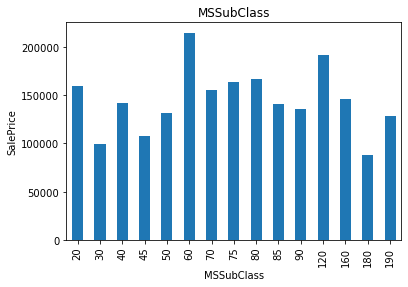

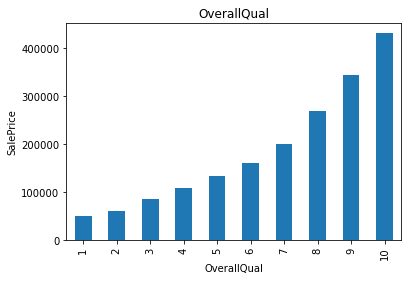

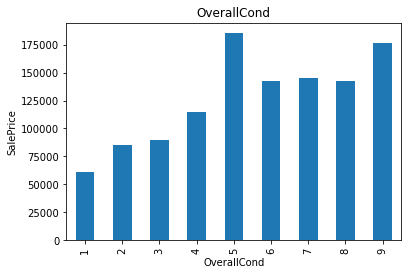

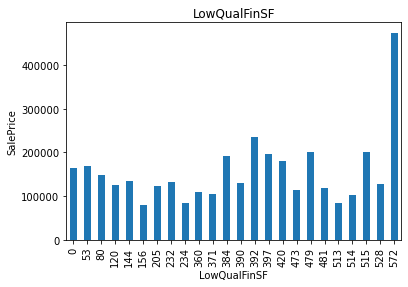

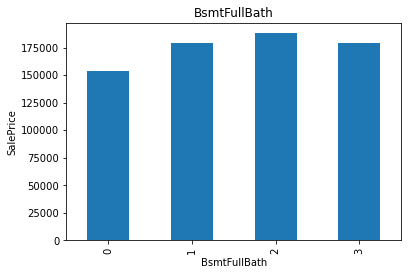

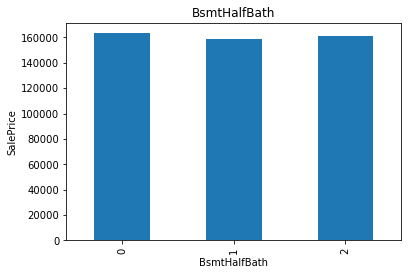

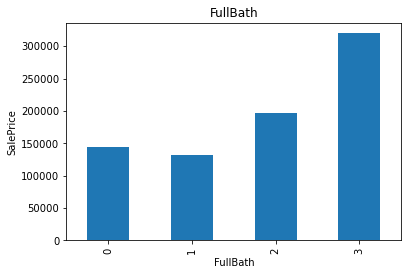

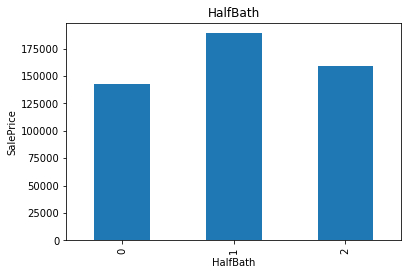

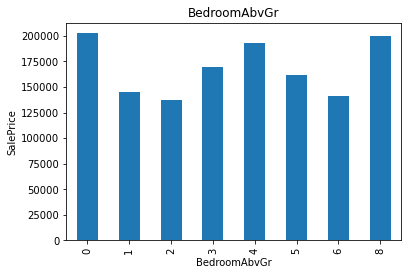

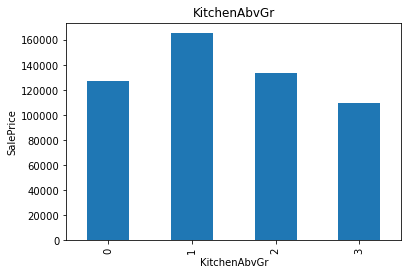

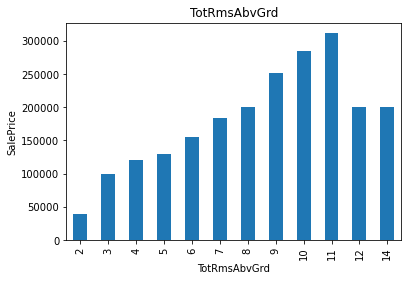

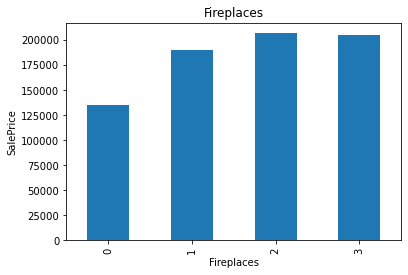

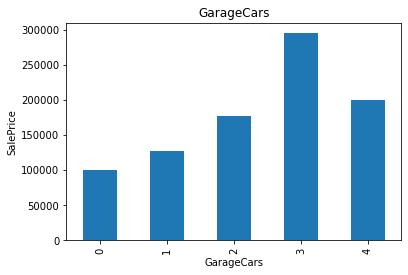

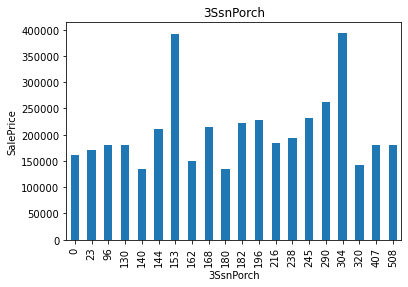

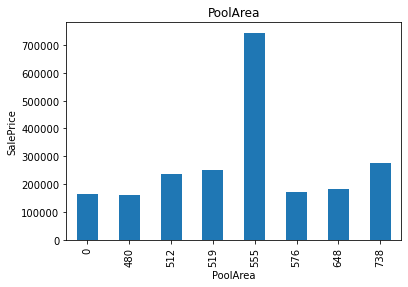

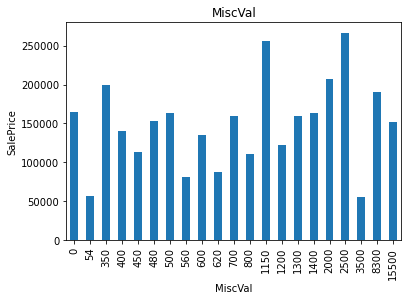

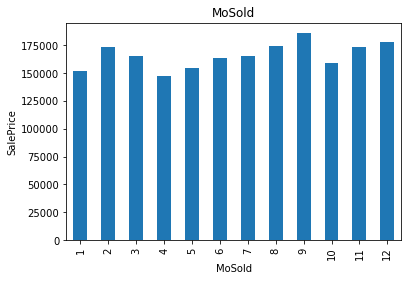

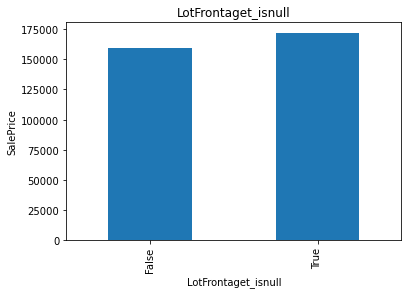

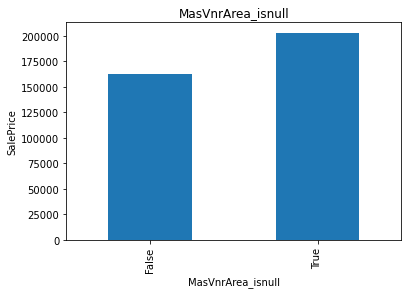

In [10]:
for i in discrete:
    data.groupby(i)['SalePrice'].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    plt.title(i)
    plt.show()

In [16]:
# Creating a list 'continuous'
continuous = [i for i in dfn if i not in discrete+year_c+['Id','Unnamed: 0']]
print("Number of Continuous variables are: {}".format(len(continuous)))

Number of Continuous variables are: 16


In [17]:
continuous

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

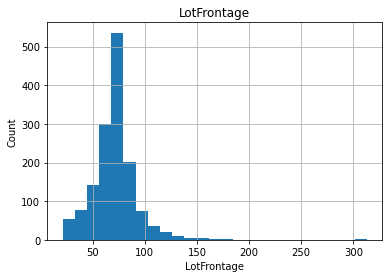

In [21]:
plt1 = data['LotFrontage'].hist(bins=25)
plt.xlabel("LotFrontage")
plt.ylabel("Count")
plt.title("LotFrontage")
plt.show()

In [25]:
# Now dividing 'continuous' into sections so that while running a for loop for plotting the histogram, 
# excessive memory consumption does not cause the kernel to hang. 
continuous_2 = ['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF']

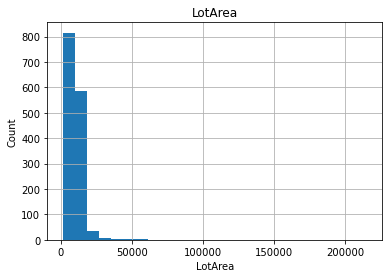

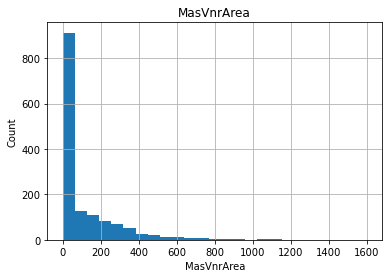

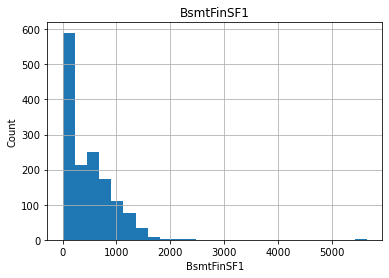

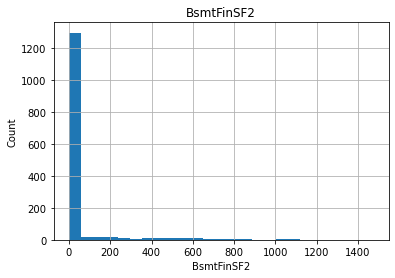

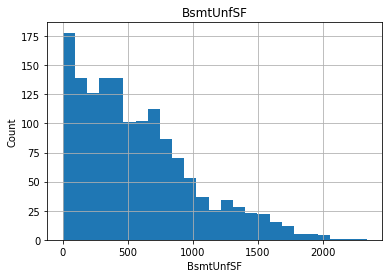

In [24]:
for i in continuous_2:
    data[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(i)
    plt.show()

In [26]:
continuous_3 = ['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

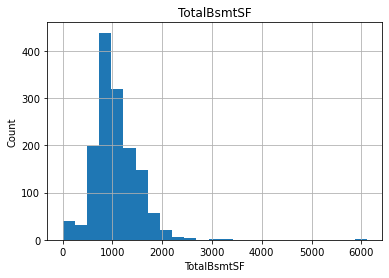

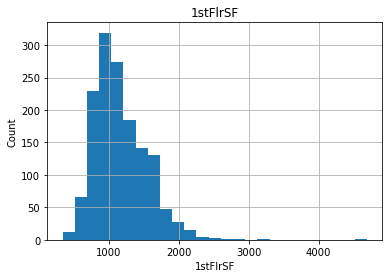

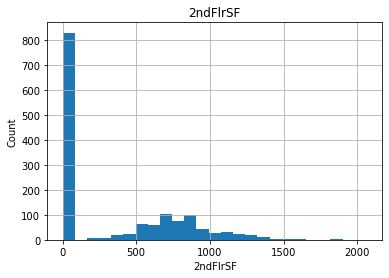

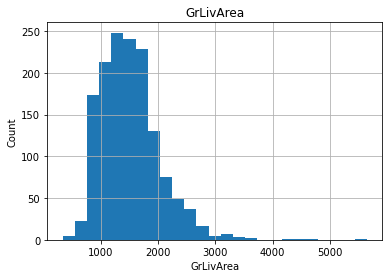

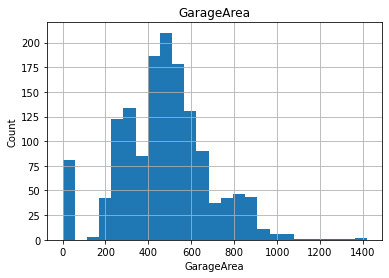

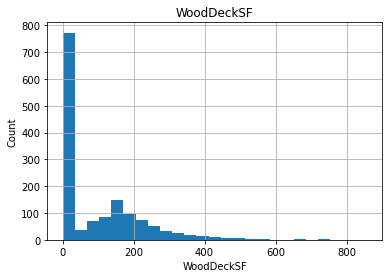

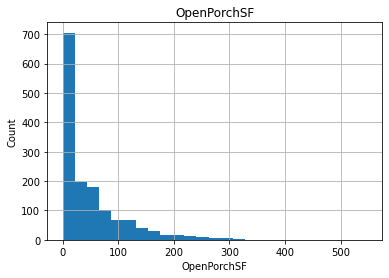

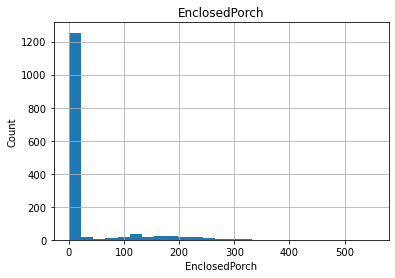

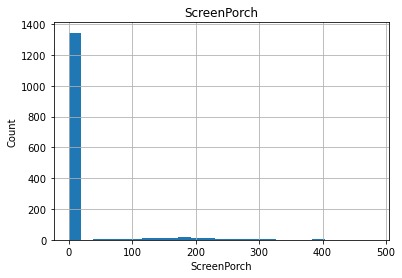

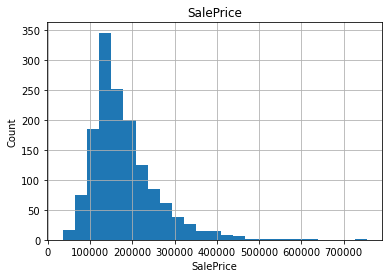

In [27]:
for i in continuous_3:
    data[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.title(i)
    plt.show()

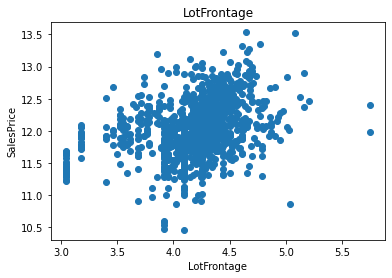

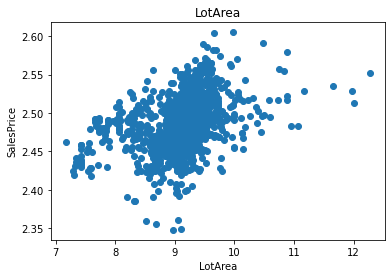

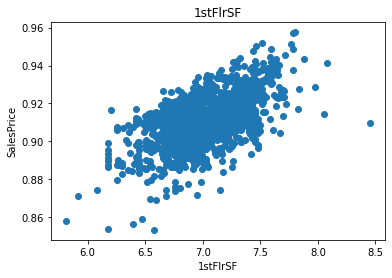

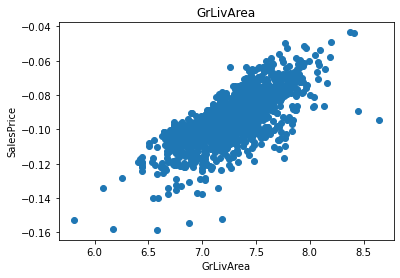

C:\Users\fahiy\Documents\Springboard-Tools\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


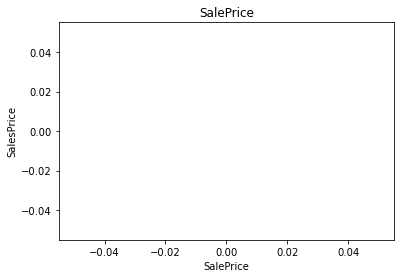

In [30]:
# Now We will be using logarithmic transformation
for feature in continuous:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

#### Finding outliers

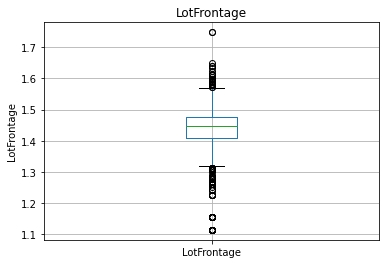

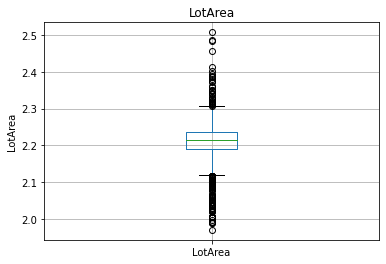

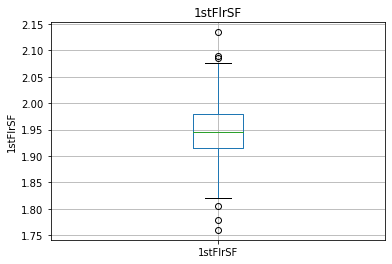

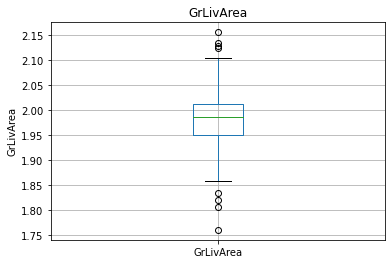

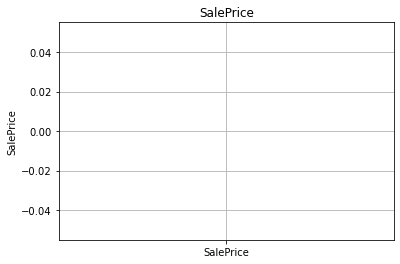

In [32]:
for feature in continuous:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

#### Temporal Variables or DateTime Variables:

In [34]:
# List of Variables that contain year information
year_feature = [c for c in dfn if 'Yr' in c or 'Year' in c]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBlt_isnull']

Text(0.5, 1.0, 'House Price vs YearSold')

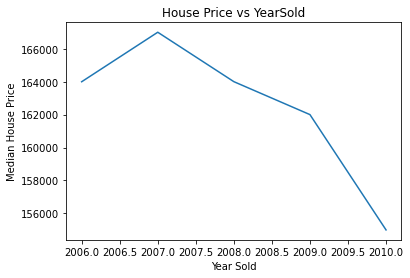

In [35]:
# Trying to see if there's a relationship between year the house is sold and the SalePrice
dfn.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")


#### Looks like Sale Price decreases with time. 

#### Checking for Outliers by plotting SalePrice in Histogram

Text(0, 0.5, 'SalePrice')

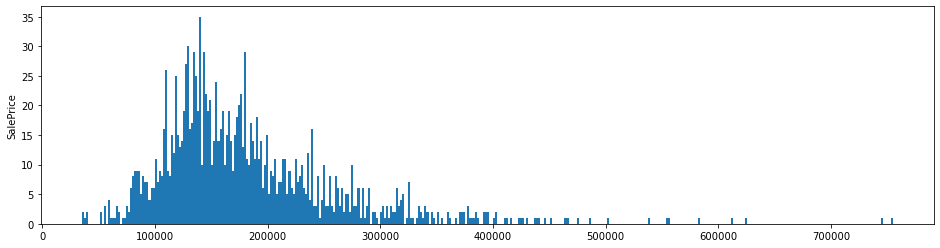

In [37]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] =16.0
fig_size[1] = 4.0
x =dfn['SalePrice']
plt.hist(x,bins=400)
plt.ylabel('SalePrice')

#### Checking for Outliers by plotting SalePrice in Box Plot

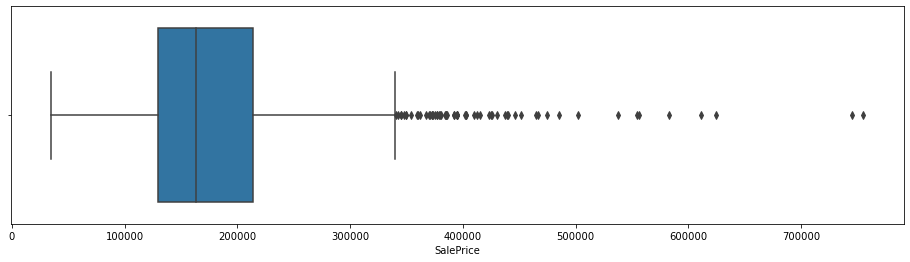

In [38]:
sns.boxplot(x=dfn['SalePrice'])

#### We can see the presence of ouliters in the above plots. 

### Plotting Histogram using Seaborn

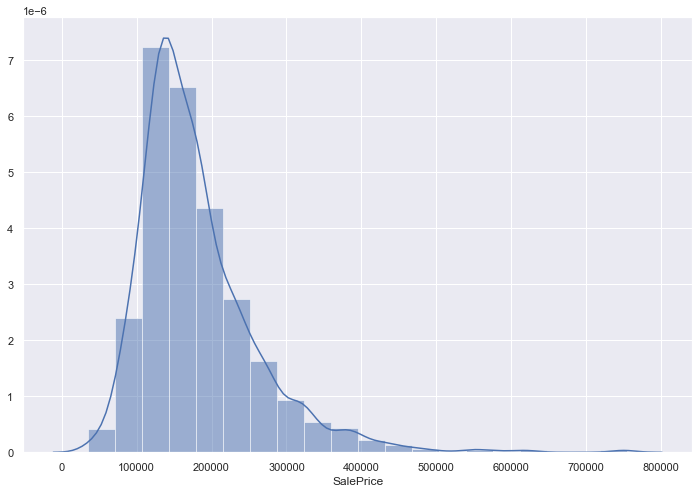

In [39]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(dfn['SalePrice'], color='b', bins=20, hist_kws={'alpha': 0.5});

#### We can see that the distribution is highly skewed. 

In [41]:
dfn['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64